In [1]:
import pandas as pd 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cars93 = pd.read_csv(r"E:\Adv Analytics\Datasets\Cars93.csv")
cars93

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [10]:
pd.crosstab(index=cars93['Type'],columns=cars93['AirBags'],margins=True)


AirBags,Driver & Passenger,Driver only,None,All
Type,,,,
Compact,2,9,5,16
Large,4,7,0,11
Midsize,7,11,4,22
Small,0,5,16,21
Sporty,3,8,3,14
Van,0,3,6,9
All,16,43,34,93


In [11]:
ctab = pd.crosstab(index=cars93['Type'],columns=cars93['AirBags'])
ctab

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,4,7,0
Midsize,7,11,4
Small,0,5,16
Sporty,3,8,3
Van,0,3,6


In [12]:
test_statistic , p_value , df,expected_frequencies = chi2_contingency(ctab)
print("P-Value",p_value)

P-Value 0.000272287749055816


In [18]:
test_statistic , p_value , df,expected_frequencies = chi2_contingency(ctab)
print(chi2)
print(p_value)
print(test_statistic)


33.0009307766447
0.000272287749055816
33.0009307766447


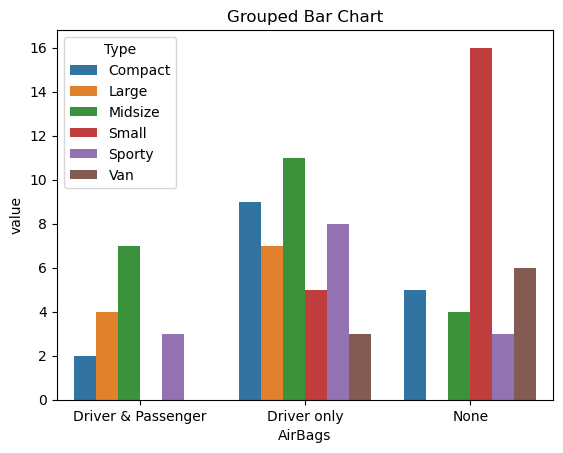

In [19]:
df_bar = pd.melt(ctab.reset_index(),id_vars="Type")
sns.barplot(x="AirBags",
           y="value",
           hue="Type",
           data=df_bar)
plt.title("Grouped Bar Chart")
plt.show()